## ADABOOST PRUEBA 1
PROYECTO DE GESTIÓN DE REDES - Gestión de redes IoT

In [2]:
import pandas as pd
import os

# Definir rutas de las carpetas
test_path = "Test_Prueba1"
train_path = "Train_Prueba1"

# Cargar archivos de prueba
test_files = {
    "ARP_Spoofing": "ARP_Spoofing_test.csv",
    "Benign": "Benign_test.csv",
    "DDoS": "DDoS_test.csv",
    "DoS": "DoS_test.csv",
    "MQTT": "MQTT_test.csv",
    "Recon": "Recon_test.csv"
}

test_data = {name: pd.read_csv(os.path.join(test_path, file)) for name, file in test_files.items()}

# Cargar archivos de entrenamiento
train_files = {
    "Benign": "Benign_train.csv",
    "DDoS": "DDoS_train.csv",
    "DoS": "DoS_train.csv",
    "MQTT": "MQTT_train.csv",
    "Recon": "Recon_train.csv",
    "ARP_Spoofing": "Spoofing_train.csv"
}

train_data = {name: pd.read_csv(os.path.join(train_path, file)) for name, file in train_files.items()}

In [3]:
# Acceder a un DataFrame 
df_analizar = test_data["Benign"]
df_analizar.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack_Label
0,319606.0,6.0,64.0,1.366686,1.366686,0.0,0.0,0.0,0.0,0.5,...,16.262070,77.3,1.694702e+08,13.5,12.663093,23.013372,265.175418,1.0,244.6,Benign
1,33109.3,6.0,64.0,1.576552,1.576552,0.0,0.0,0.0,0.0,0.5,...,14.232702,81.3,1.513958e-04,5.5,12.476242,20.128080,236.705162,0.9,38.5,Benign
2,22840.1,6.0,64.0,0.303351,0.303351,0.0,0.0,0.0,0.0,1.0,...,8.935370,88.4,8.418560e-05,5.5,13.286643,12.636522,105.067650,0.9,38.5,Benign
3,240123.2,6.0,64.0,2.033665,2.033665,0.0,0.0,0.0,0.0,0.5,...,17.569529,80.5,1.694705e+08,13.5,12.793984,24.861021,309.436651,1.0,244.6,Benign
4,236089.2,6.0,69.9,0.911873,0.911873,0.0,0.0,0.0,0.0,0.5,...,15.417590,76.3,1.694698e+08,13.5,12.598301,21.815770,238.560331,1.0,244.6,Benign


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Unir los DataFrames de entrenamiento y prueba
train_df = pd.concat(train_data.values(), ignore_index=True)
test_df = pd.concat(test_data.values(), ignore_index=True)

# Separar características y etiquetas
X_train = train_df.drop(columns=['Attack_Label'])
y_train = train_df['Attack_Label']
X_test = test_df.drop(columns=['Attack_Label'])
y_test = test_df['Attack_Label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo AdaBoost con un árbol de decisión como base
base_estimator = DecisionTreeClassifier(max_depth=3)  
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=200, learning_rate=0.01, random_state=42)
# Mejores hiperparámetros: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 200}
# Entrenar el modelo
adaboost_model.fit(X_train, y_train)



# Hacer predicciones
y_pred = adaboost_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Promedio ponderado
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


c:\Users\itsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9625
Precision: 0.9661
Recall: 0.9625
F1-Score: 0.9629


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

base_estimator = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)


c:\Users\itsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\itsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\itsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\itsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Mejores hiperparámetros: {'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 200}


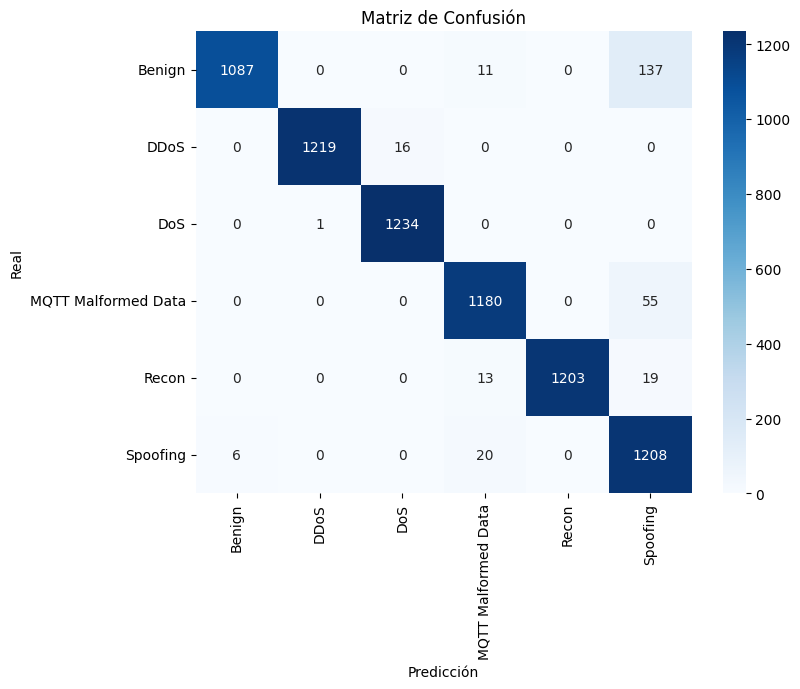

                     precision    recall  f1-score   support

             Benign       0.99      0.88      0.93      1235
               DDoS       1.00      0.99      0.99      1235
                DoS       0.99      1.00      0.99      1235
MQTT Malformed Data       0.96      0.96      0.96      1235
              Recon       1.00      0.97      0.99      1235
           Spoofing       0.85      0.98      0.91      1234

           accuracy                           0.96      7409
          macro avg       0.97      0.96      0.96      7409
       weighted avg       0.97      0.96      0.96      7409



In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))